# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
 Throughout the specified drug process, Capomulin and Ramicane has the best results as far as diminishing the tumor size.  
 The other two which were Infubinol & Ceftamin did not have that kind of luck.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#Looking at the first 5 rows of the metadata
mouse_metadata.head()
study_results.head()

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_of_mice = combined_data["Mouse ID"].nunique()
num_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_df = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_data_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_mouse_id = combined_data["Mouse ID"].isin(duplicate_data_df)

Duplicate_df = combined_data.loc[Duplicate_mouse_id]
Duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Good_df = combined_data[~Duplicate_mouse_id]
print(Good_df.shape)
Good_df.head()

(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame
good_mice = Good_df["Mouse ID"].nunique()
good_mice

248

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
drug_mean= combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).mean()
drug_median= combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).median()
drug_var= combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).var()
drug_stdev= combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).std()
drug_sem= combined_data['Tumor Volume (mm3)'].groupby(combined_data['Drug Regimen']).sem()
tumor_summary= {'Mean Tumor Volume': drug_mean, 'Meadian Tumor Volume': drug_median, 'Tumor Volume Variance': drug_var, 'Tumor Volume Std. Dev.': drug_stdev, 'Tumor Volume Std. Err.': drug_sem}
tumor_summary= pd.DataFrame(tumor_summary)
tumor_summary

,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# for each regimen
Good_df = combined_data[~Duplicate_mouse_id]
print(Good_df.shape)
Good_df.head()


(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:

# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_drug = combined_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
advanced_drug



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

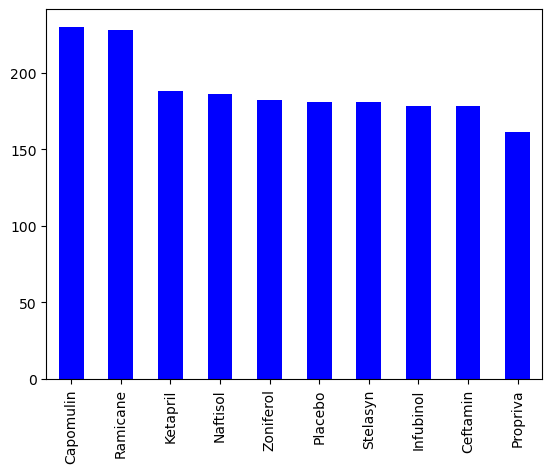

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = combined_data["Drug Regimen"].value_counts()
mice_count
plot_panda = mice_count.plot.bar(color='b')


<function matplotlib.pyplot.show(close=None, block=None)>

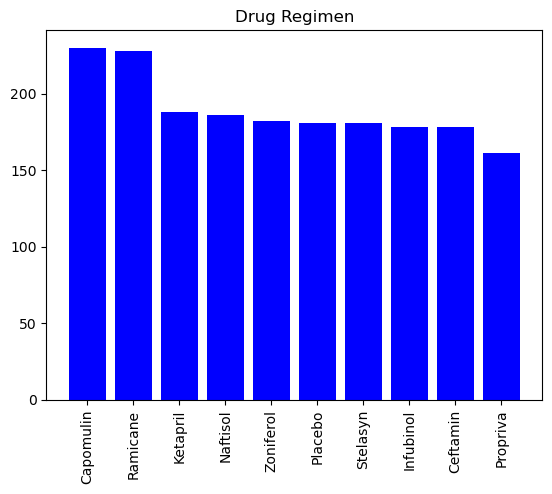

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color="b")
plt.title("Drug Regimen")
plt.xticks(rotation="vertical")
plt.show

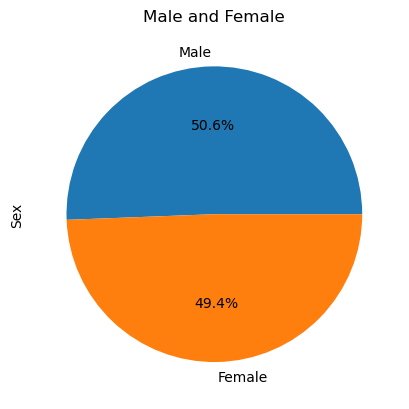

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_of_mice = combined_data['Sex'].value_counts()
Sex_of_mice.plot(kind= 'pie', autopct="%1.1f%%")
plt.title("Male and Female")
plt.show()

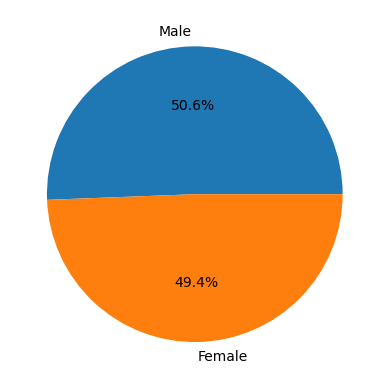

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
sizes = Sex_of_mice
fig, ax =plt.subplots()
ax.pie(sizes,labels=labels, autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Time_of_mouse_df = combined_data.groupby("Mouse ID").max().reset_index()[["Mouse ID", "Timepoint"]]
print(Time_of_mouse_df.shape)
Time_of_mouse_df.head(3)





(249, 2)


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45


In [15]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_observ_df = pd.merge(combined_data, Time_of_mouse_df, on = ["Mouse ID", "Timepoint"])
print(final_observ_df.shape)
final_observ_df.head(3)

(249, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = combined_data["Drug Regimen"].unique()
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
t_volume_data_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in regimen:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = final_observ_df["Drug Regimen"]== treatment
    tumor_volume = final_observ_df.loc[quartiles, "Tumor Volume (mm3)"]
    t_volume_data_list.append(tumor_volume)
     
    quartiles
    # Determine outliers using upper and lower bounds
    quartiles =tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = tumor_volume.where((tumor_volume < lower_bound) | (tumor_volume > upper_bound))


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(outliers)
    
    


Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
52    NaN
65    NaN
66    NaN
68    NaN
97    NaN
111   NaN
118   NaN
122   NaN
133   NaN
134   NaN
135   NaN
136   NaN
139   NaN
155   NaN
171   NaN
175   NaN
195   NaN
199   NaN
200   NaN
216   NaN
228   NaN
232   NaN
235   NaN
241   NaN
242   NaN
Name: Tumor Volume (mm3), dtype: float64


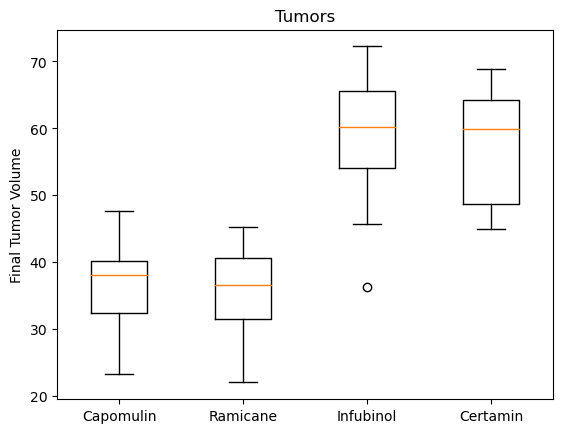

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(t_volume_data_list, labels = ["Capomulin", "Ramicane", "Infubinol", "Certamin"])
plt.title("Tumors")
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

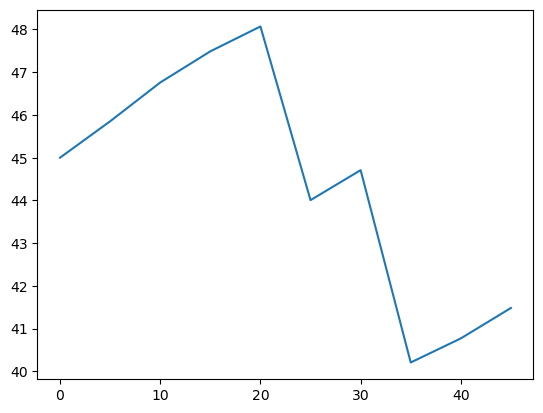

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treated_with_cap = Good_df.loc[Good_df["Mouse ID"] == 'l509', :]
treated_with_cap
x1 = treated_with_cap ["Timepoint"]
x2 = treated_with_cap ["Tumor Volume (mm3)"]
plt.plot(x1,x2)
plt.show()


/var/folders/26/x6_l2qcn2kj_kcgkkfht28580000gn/T/ipykernel_89580/3597071979.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_regimen =weight_tumor_vol.groupby(['Mouse ID']).mean()


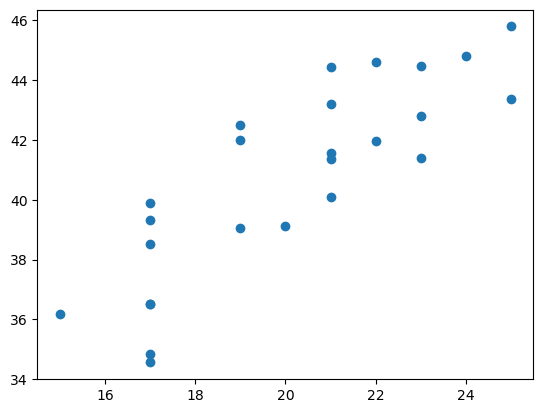

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#plt.scatter(weight, x='Weight (g)', y= "Tumor Volume (mm3) ", s=weight.4)
#plt.show()
#plt.scatter(x= 'Weight (g)', y= "Tumor Volume (mm3)")

#plt.show()
# Isolate cases that only use the Capomulin regimen
weight_tumor_vol = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
weight_tumor_vol
Capomulin_regimen =weight_tumor_vol.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_regimen['Weight (g)'],  Capomulin_regimen['Tumor Volume (mm3)'])
plt.show()

# Find average tumor volume for each mouse



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55


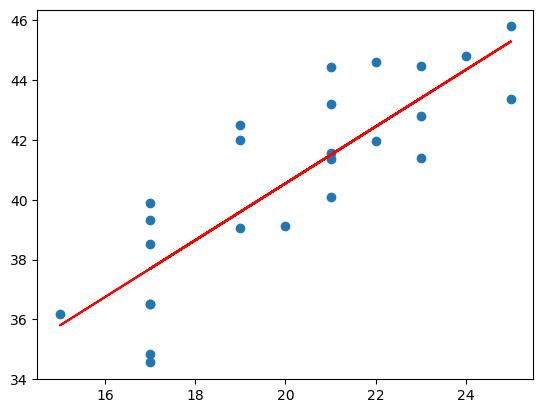

In [23]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Regress = round(st.pearsonr(Capomulin_regimen [ "Weight (g)"],Capomulin_regimen["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {Regress}")

x_val = Capomulin_regimen["Weight (g)"]
y_val = Capomulin_regimen["Tumor Volume (mm3)"]





(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
mslope = 0.95
bin = 21.55
y_val = Capomulin_regimen["Weight (g)"]*mslope+bin

plt.scatter(Capomulin_regimen["Weight (g)"], Capomulin_regimen["Tumor Volume (mm3)"])
plt.plot(Capomulin_regimen["Weight (g)"], y_val, color="r")
plt.show()


